## Exercise 2: t-SNE visualization of Amazon reviews with polarity based color-coding


Given Dataset consists of reviews of fine foods from amazon. Reviews describe (1)product and user information, (2)ratings, and (3) a plain text review.
 
## Objective:
* To determine given review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).
* To visualize Amazon reviews with polarity based color-coding via t-SSNE


## 2.1 Loading data:
The dataset is available in two forms

* 2.1(a)csv file
* 2.1(b)SQLite Database


In [1]:
# All necessary module
%matplotlib inline
#import  sys
import re
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

In [2]:
# Reading CSV file and printing first five rows 
amz1 = pd.read_csv('Reviews.csv') # reviews.csv is  dataset file
print(amz1.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [3]:
# dimensions of dataset and columns name
amz=amz1[0:10000]
print(amz.shape) 
print(amz.columns)

(10000, 10)
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


The amazon reviews datafile contains 568454 rows of entry and 10 columns.For given objective, processing of data is necessary."Score" and "text" columns is processed for required result.

In [4]:
'''
amz_spl = amz.head(10000)
#print(amz_spl)
'''

'\namz_spl = amz.head(10000)\n#print(amz_spl)\n'

In [5]:
# Processing
#Give reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating.

def score_part(x):
    if x < 3:
        return 'negative'
    return 'positive'

actualScore = amz['Score']
New_score = actualScore.map(score_part)
#print(New_score)
amz['Score']=New_score

# If score is equal to 3,it is considered as neutral score.

    





C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [6]:
print(amz.shape)
amz.head(5)

#Now,check the Score column  for postive and negative entry of reviews
#


(10000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
#Processing of ProductId
#Sorting data according to ProductId in ascending order
sorted_data=amz.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [8]:
print(sorted_data.head()) # printing sorted data

        Id   ProductId          UserId      ProfileName  HelpfulnessNumerator  \
2774  2775  B00002NCJC  A13RRPGE79XFFH         reader48                     0   
2773  2774  B00002NCJC  A196AJHU9EASJN     Alex Chaffee                     0   
1243  1244  B00002Z754  A3B8RCEI0FXFI6        B G Chase                    10   
1244  1245  B00002Z754  A29Z5PI9BW2PU3           Robbie                     7   
9524  9525  B00005V3DC  A2ZYCEEYBUQZND  Robby "Robby C"                     5   

      HelpfulnessDenominator     Score        Time  \
2774                       0  positive  1281052800   
2773                       0  positive  1282953600   
1243                      10  positive   962236800   
1244                       7  positive   961718400   
9524                       7  positive  1176249600   

                             Summary  \
2774                    Flies Begone   
2773                   thirty bucks?   
1243  WOW Make your own 'slickers' !   
1244                   Great

In [9]:

# To check the duplications in raw data
dupli=sorted_data[sorted_data.duplicated(["UserId","ProfileName","Time","Text"])]
print(dupli.head(5))

        Id   ProductId          UserId    ProfileName  HelpfulnessNumerator  \
2334  2335  B0001FQVCK   A5D06XJHDXK75          C. Po                     3   
29      30  B0001PB9FY  A3HDKO7OW0QNK4   Canadian Fan                     1   
2323  2324  B0001VWE0C   AQM74O8Z4FMS0       Sunshine                     0   
2309  2310  B0001VWE0M   AQM74O8Z4FMS0       Sunshine                     0   
4640  4641  B0002NYO9I   A5DVX3B075B09  Patricia Kays                     0   

      HelpfulnessDenominator     Score        Time  \
2334                       3  positive  1190592000   
29                         1  positive  1107820800   
2323                       0  negative  1127606400   
2309                       0  negative  1127606400   
4640                       0  positive  1338940800   

                                          Summary  \
2334  Chocolate Italian kisses - need I say more?   
29                The Best Hot Sauce in the World   
2323                               Below 

#### observation:
* Same profile ID gave samiliar reviews at the same time.
* Repitation of text,summary,time,profile-ID for same product


In [10]:
# Remove Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(9515, 10)

In [11]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(amz['Id'].size*1.0)*100

95.15

In [12]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [13]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(9515, 10)


positive    8082
negative    1433
Name: Score, dtype: int64

#### Data Pre-processing on raw data:

Every datasets contains some unwanted data.Raw data is preprocessed by removing duplication. here, Data is preprocessed on csv data. Given amazon datasets is also avaliable in form of SQLite Database. 


## .1(b)SQLite Database 
 SQLITE dataset is easier to query the data and visualise the data efficiently. 

In [14]:
# using the SQLite Table to read data.
con = sqlite3.connect('database.sqlite') 



#filtering only positive and negative reviews i.e. 

filtered_data = pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3
""", con) 


Above query is used the SQLite Table to read data.Here, data is preprocessed using csv file and output is final['Score'].

# Text Preprocessing:

In [15]:
# find sentences containing HTML tags

i=0;
for sent in final['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1; 

1
Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


#### Observations:
* Text containing html tags like <.*?> is removed for processing the data.
Read the sentences and find html tags and remove it.

In [16]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'didn', 'm', 'wasn', 'i', 'when', 'them', 'yours', 'of', 'can', "haven't", 'doing', 'there', 'any', 'mustn', 'this', 'both', 'has', 'ma', 'were', 'wouldn', 'hasn', 'couldn', 'what', 'me', 'did', "wouldn't", 'because', 'with', 'before', 'aren', "didn't", 't', 'here', 'will', 'his', 'haven', 'won', 'down', 'll', "weren't", 'her', 'that', 'to', 'again', 've', "mightn't", "shouldn't", 'she', 'doesn', 'just', 'too', 'most', 'ours', 'not', 'itself', 'being', 'herself', 'are', "mustn't", 'by', 'further', "wasn't", 'each', 'under', "you'd", 's', 'mightn', "hadn't", "won't", 'our', 'himself', 'should', 'while', 'over', 'for', "that'll", 'some', 'how', 'below', 'an', 'few', "she's", "doesn't", 'as', 'into', 'hadn', 'than', 'or', 'd', 'does', 'you', 'o', 'who', 'why', 'on', 'after', 'whom', 'hers', 'about', 'y', 'isn', 'been', 'if', 'am', "you've", 'all', 'my', "isn't", 'during', 'having', 'have', 'is', 'do', 'other', 'ain', "needn't", 'now', 'through', 'had', "shan't", 'weren', 'from', "hasn't"

In [17]:
#print(final['Text'][0:10000])

#### Observations:
* English stopwords , printed in above text wwhich are common in almost any sentence are removed using nltk SnowballStemmer .Then we are cleaning the punctuations and html tags.

In [18]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase.
i=0
str1=' '
final_string=[]
all_positive_words=[] 
all_negative_words=[] 
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1
    
print(all_positive_words[10])
print(all_negative_words[10])

b'avail'
b'tast'


In [19]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 

In [20]:
final.head(3) #below the processed review can be seen in the CleanedText Column 



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
2774,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,positive,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...,b'use victor fli bait season cant beat great p...
2773,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,positive,1282953600,thirty bucks?,Why is this $[...] when the same product is av...,b'product avail www amazon com victor trap unr...
1243,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,positive,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,b'receiv shipment could hard wait tri product ...


In [21]:
k=final['CleanedText']
R_data = k[0:10000]  # R_data is used for further processing
pn_score =final['Score'][0:10000] # pn-score is positive or negative score
print(pn_score.shape)
print(R_data.shape)

(9515,)
(9515,)


After removing duplication & cleaning data, R_data is used for further processing and pn-score is positive or negative score

### Methods:
* Bag of Words
* Avg word2vec
* Tf-idf
* tf-idf weighted Word2Vec

Using above four method is used for featurization of data.t-sne plot is observed based on reviews with polarity.The featurization of above four method is as follows:-

# 1. Bag of Words (BoW)

In [22]:
count_vect = CountVectorizer() #in scikit-learn
data = count_vect.fit_transform(R_data.values)
data.get_shape()
# bi-gram, tri-gram and n-gram#
#count_vect = CountVectorizer(ngram_range=(1,2) ) #in scikit-learn
#final_bigram_counts = count_vect.fit_transform(R_data.values)
#final_bigram_counts.get_shape()



(9515, 11779)

In [23]:
#for 10k reviews, bow
data1= data[0:10000,:]
print(data1.shape)

(9515, 11779)


# 2. Avg word2vec
Firstly, word2vec model is designed for amazon reviews using gensim module.

In [24]:
# traing word2vec model for amazon reviews using gensim
import gensim
i=0
list_of_sent=[]
for sent in final['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)
    

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [25]:
print(len(list_of_sent))
#print(final['Text'].values[0])
#print("*****************************************************************")
#print(list_of_sent[56])

9515


In [26]:
#Creating word2vec on cleaned text
import gensim
w=[]
for text in final['CleanedText'].values: 
    filter_text=[]
    for i in text.split():
        if(i.isalpha()):
            filter_text.append(i.lower())
        else:
            continue 
    w.append(filter_text)
print(len(w))
# w word2vec of cleaned text

9515


In [27]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=100, workers=4) 
#this model is used in avg word2vec   


In [28]:
words = list(w2v_model.wv.vocab)
print(len(words))

5804


#### Avg Word2Vec 

In [29]:
# average Word2Vec

sent_vectors = []; 
for sent in R_data: # for each review/sentence
    sent_vec = np.zeros(100) 
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: 
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)


print(len(sent_vectors))

#print(sent_vectors[0:4])





C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


9515


In [30]:
# to check the formator of data vector
print(sent_vectors[7890])
# convert the nan value into zero for further processing
b = np.where(np.isnan(sent_vectors), 0, sent_vectors)
print(b[7890])


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [31]:
# converting list to nd array

data2_avg = np.asarray(b)
print(type(data2_avg))
#data2 is used for further processing

<class 'numpy.ndarray'>


# 3. tf-idf


In [32]:
# tf-idf 
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(R_data.values)
final_tf_idf.get_shape()

(9515, 212248)

In [33]:
features = tf_idf_vect.get_feature_names()
len(features)

212248

In [34]:
data3 =final_tf_idf[:,:]
#print(data3)
print(type(data3))

<class 'scipy.sparse.csr.csr_matrix'>


#  4.TF-IDF weighted Word2Vec

In [35]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() 

tfidf_sent_vectors = []; 
row=0;
for sent in R_data: 
    sent_vec = np.zeros(100) # 100 dimension
    weight_sum =0; 
    for word in sent: 
        try:
            vec = w2v_model.wv[word]
            
            tfidf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [36]:
print(len(tfidf_sent_vectors))

9515


In [37]:
data41 = np.asarray(tfidf_sent_vectors)
print(type(data41))


<class 'numpy.ndarray'>


In [38]:
print(tfidf_sent_vectors[786])
bcd = np.where(np.isnan(tfidf_sent_vectors), 0, tfidf_sent_vectors)
print(bcd[786])

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


tfidf_sent_vectors contains nan value. In above program is replacing nan value to 'o'.

In [39]:
#check the type od data
data2_tf = np.asarray(bcd)
print(type(data2_tf))

<class 'numpy.ndarray'>


In [40]:
#print(myarray2[4])
data4=data41[0:10000,:]


As there is computational limit , 10k data is processed for t-sne plots.

a
vectorization technique is  bag  of words
d
<class 'numpy.ndarray'>
e
(9515, 3)
f
g
h


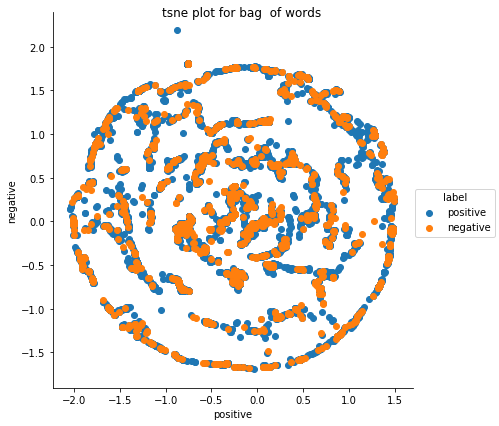

vectorization technique is  tf-idf
d
<class 'numpy.ndarray'>
e
(9515, 3)
f
g
h


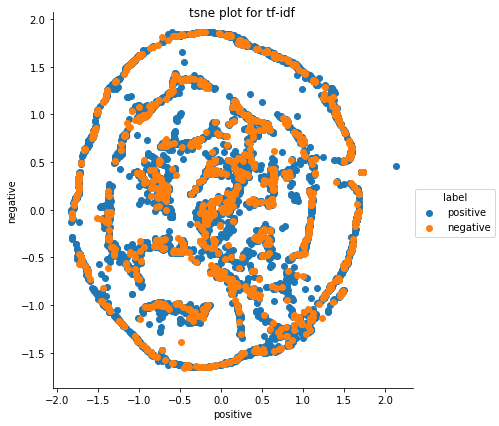

In [41]:
from sklearn.manifold import TSNE
import seaborn as sn
print("a")
R=['bag  of words','tf-idf']
X =[data,data3] # for large datavalues  

Y=[data[0:10000,10000],data3[0:10000,10000]] # for small datavalues to run .


#data_1000 = data[0:1000,:].toarray()
#print(data_1000.shape)
#print("b")
labels_1000 = pn_score[0:10000]
#print(labels_1000.shape)
#print("c")
for i in range(len(X)):
    Y_data=Y[i].toarray()
    print('vectorization technique is ',R[i])
#print(data_1000)
    model = TSNE(n_components=2, random_state=0)
    print("d")
    tsne_data = model.fit_transform(Y_data)
    print(type(tsne_data))
    print("e")
    tsne_data = np.vstack((tsne_data.T, labels_1000)).T
    print(tsne_data.shape)
    print("f")
    tsne_df = pd.DataFrame(data=tsne_data, columns=("positive", "negative", "label"))
    print("g")

    # Ploting the result of tsne
    aa=sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'positive', 'negative').add_legend()
    print("h")
    aa.fig.suptitle('tsne plot for '+str(R[i]))
    plt.show()

#print(labels_1000)

#### Observations
t-sne plot for Bag of words and tf-idf is shown above.After Text preprocessing the data and featurization, t-sne is plotted to visualize the polarity based on reviews.
* here, only 10k is used out of 393931 values of datasets.
* here,10000 dimensional is used for converting into low dimensional(i.e. 2D).All positive and negative reviews are visualized as shown in above figure.
* For Bag of words,In t-sne plot ,postive and negative polarity reviews are visualized in the form of circles. Negative points and postive points are overlapping each others in 2D views.It is observed that positive and negative points are nearly equal in quantity.
* For tf-idf,t-sne plot is also visualized in forms circle here and positive and negative polarity reviews are wonderfully visualized on t-sne plot.




(1000,)
c
vectorization technique is  Avg word2vec
d
e
(1000, 3)
f
g
h


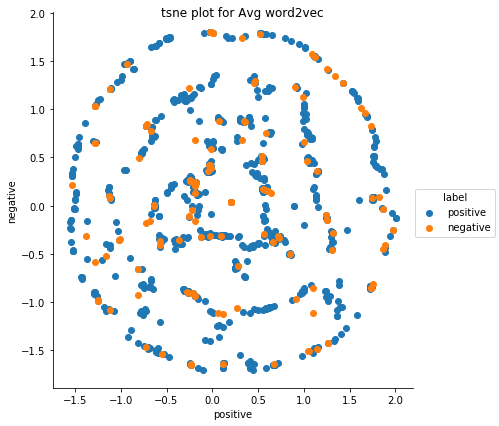

vectorization technique is  tf-idf weighted Word2Vec
d
e
(1000, 3)
f
g
h


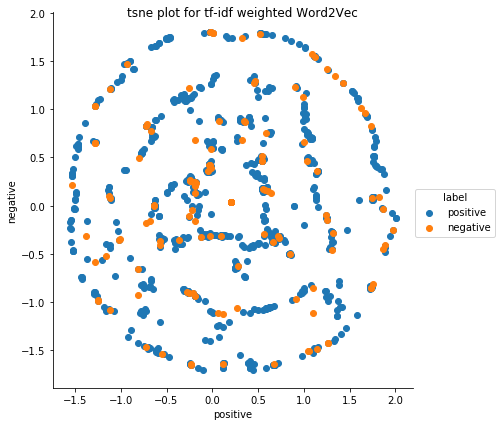

In [82]:
w2v_list=[data2_avg,data2_tf] # for large dataset
w2v_small_list=[data2_avg[0:1000,:],data2_tf[0:1000,:]] # for small datasets
#data_1000 = data2_tf[0:1000,:]
#print(data_1000.shape)
#print("b")
R1=['Avg word2vec','tf-idf weighted Word2Vec']
labels_1000 = pn_score[0:1000]
print(labels_1000.shape)
print("c")
for j in range(len(w2v_small_list)):
    w2v_data=w2v_small_list[j]
    print('vectorization technique is ',R1[j])
    model = TSNE(n_components=2, random_state=0)
    print("d")
    tsne_data = model.fit_transform(w2v_data)
    print("e")
    tsne_data = np.vstack((tsne_data.T, labels_1000)).T
    print(tsne_data.shape)
    print("f")
    tsne_df = pd.DataFrame(data=tsne_data, columns=("positive", "negative", "label"))
    print("g")

    # Ploting the result of tsne
    aa1=sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'positive', 'negative').add_legend()
    print("h")
    aa1.fig.suptitle('tsne plot for '+str(R1[j]))
    plt.show()

#### Observation
* In  Average word2vec and tf-idf weighted Word2Vec, only 100 dimensions are plotted on t-sne because of computational limit.
* t-sne plot for  Average word2vec and tf-idf weighted Word2Vec are visualized as above. As data points are taken less here(nearly 1000) for 100 dimensions ,the structure may seems different than actual t-sne plot of them.
* It is observed from  Average word2vec and tf-idf weighted Word2Vec plots negative points are centered and postive points are going away from center.It means if dimesions is large and datapoints is high, all negative points will concentrated on the center and positive points will try to go away from center.
* the structure of t-sne plot varies accouding to dimensions and feturizations data.
* Here, we are plotting bag of words and tf-idf t-sne seperatly and  Average word2vec and tf-idf weighted Word2Vec seperately.Because while  Average word2vec and tf-idf weighted Word2Vec featurization vector is already in the form of nd.array while bag of words and tf-idf was not and it is converted into nd.array by using x.toarray().

From t-sne plots,high dimensional data can be visualized in low dimension(2D).The objective to visualize the postive and negative reviews using t-sne is done.

In [43]:
print(336824-57107)

279717
